#DA24C026 - Assignment 5

#Task 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("nursery.data", header = None)

In [4]:
data.columns = ["parents", "has_nursery", "form", "children", "housing", "finance", "social", "health", "class"]

In [5]:
data.head()

,parents,has_nursery,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [6]:
data.describe()

,parents,has_nursery,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [7]:
data['class'].unique()

array(['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'],
      dtype=object)

As we need a 3 class dataset we collapse recommend, very_recom and spec_prior class into recommend class

In [8]:
data["class"] = data["class"].replace("spec_prior", "recommend")
data["class"] = data["class"].replace("very_recom", "recommend")

In [9]:
data['class'].describe()

,class
count,12960
unique,3
top,recommend
freq,4374


Train - Test Split

(80-20)

When Cross validation will be done using Grid Search, automatically a part of training data will be used as validation set.

In [10]:
def train_val_test(df):
  x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2)
  return x_train, x_test, y_train, y_test

**For model training and hyper parameter tuning, "Grid Search" is used.**

**Grid Search returns the combination of hyperparameters which yeild best accuracy.**

##Decison Tree with categorical features

In [11]:
le = LabelEncoder()
x_encoded = data.copy()
for column in data.iloc[:,:-1]:
  x_encoded[column] = le.fit_transform(data[column])

In [12]:
x_encoded.head()

,parents,has_nursery,form,children,housing,finance,social,health,class
0,2,3,0,0,0,0,0,2,recommend
1,2,3,0,0,0,0,0,1,priority
2,2,3,0,0,0,0,0,0,not_recom
3,2,3,0,0,0,0,2,2,recommend
4,2,3,0,0,0,0,2,1,priority


In [13]:
x_train, x_test, y_train, y_test = train_val_test(x_encoded)

Grid Search implementation

In [ ]:
# DTREE Initialization
dtree = DecisionTreeClassifier()

# Hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'criterion': ['gini', 'entropy'] # Impurity measurement method
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [ ]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Final model with the best parameters
best_model = grid_search.best_estimator_

# Evaluation on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)


Best parameters found: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9953703703703703


In [ ]:
dt_acc = [accuracy]
# we will repeat this process for 5 times to get mean accuracy and variance

In [ ]:
for i in range (4):
  x_train, x_test, y_train, y_test = train_val_test(x_encoded)
  grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, scoring='accuracy', cv=5)
  grid_search.fit(x_train, y_train)
  best_params = grid_search.best_params_
  print("Best parameters found:", best_params)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Testing accuracy:", accuracy)
  dt_acc.append(accuracy)

Best parameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9934413580246914
Best parameters found: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9949845679012346
Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9942129629629629
Best parameters found: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9969135802469136


In [ ]:
mean_acc_dt = sum(dt_acc)/len(dt_acc)
variance_dt = sum((x - mean_acc_dt)**2 for x in dt_acc)/len(dt_acc)
print("Mean accuracy for Decison Tree:", mean_acc_dt)
print("Variance for Decison Tree:", variance_dt)

Mean accuracy for Decison Tree: 0.9949845679012345
Variance for Decison Tree: 1.3693606157597965e-06


In [ ]:
# Accuracy
acc = [100*i for i in dt_acc]
acc_dt = np.mean(acc)
print("Accuracy for Decison Tree:", acc_dt)
var_dt = np.var(acc)
print("Variance for Accuracy of Decison Tree:", var_dt)

Accuracy for Decison Tree: 99.49845679012346
Variance for Accuracy of Decison Tree: 0.013693606157597571


## Decison Tree with One Hot Encoded features

One Hot Label Encoding - Converting categorical data to numerical

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # Drop='first' to avoid redundancy
x_oh_encoded = one_hot_encoder.fit_transform(data.iloc[:,:-1])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
x_oh_encoded = pd.DataFrame(x_oh_encoded, columns=one_hot_encoder.get_feature_names_out(data.columns[:-1]))

In [ ]:
x_oh_encoded["class"] = data["class"]

In [ ]:
x_oh_encoded.head()

,parents_pretentious,parents_usual,has_nursery_improper,has_nursery_less_proper,has_nursery_proper,has_nursery_very_crit,form_completed,form_foster,form_incomplete,children_2,children_3,children_more,housing_critical,housing_less_conv,finance_inconv,social_problematic,social_slightly_prob,health_priority,health_recommended,class
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,recommend
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,priority
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_recom
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,recommend
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,priority


Training and testing 5 Decison Tree models with OHE features.
 To get average accuracy and variance

In [ ]:
dt_oh_acc = []
for i in range (5):
  x_train, x_test, y_train, y_test = train_val_test(x_oh_encoded)
  dtree_oh = DecisionTreeClassifier()
  grid_search = GridSearchCV(estimator=dtree_oh, param_grid=param_grid, scoring='accuracy', cv=5)
  grid_search.fit(x_train, y_train)
  best_params = grid_search.best_params_
  print("Best parameters found:", best_params)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Testing accuracy:", accuracy)
  dt_oh_acc.append(accuracy)

Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9922839506172839
Best parameters found: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9915123456790124
Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9911265432098766
Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9965277777777778
Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing accuracy: 0.9938271604938271


In [ ]:
mean_acc_dt_oh = sum(dt_oh_acc)/len(dt_oh_acc)
variance_dt_oh = sum((x - mean_acc_dt_oh)**2 for x in dt_oh_acc)/len(dt_oh_acc)
print("Mean accuracy for Decison Tree with OHE features:", mean_acc_dt_oh)
print("Variance for Decison Tree with OHE features:", variance_dt_oh)

Mean accuracy for Decison Tree with OHE features: 0.9930555555555556
Variance for Decison Tree with OHE features: 3.869932174973301e-06


In [ ]:
# Accuracy
acc = [100*i for i in dt_oh_acc]
acc_dt_oh = np.mean(acc)
print("Accuracy for Decison Tree OHE:", acc_dt_oh)
var_dt_oh = np.var(acc)
print("Variance for Accuracy of Decison Tree OHE:", var_dt_oh)

Accuracy for Decison Tree OHE: 99.30555555555554
Variance for Accuracy of Decison Tree OHE: 0.038699321749733465


## KNN Implementation

In [ ]:
knn_acc = []
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'], # Uniform - All neighbors are treated equally, Distance - Neighbors have different influence depending upon their distance from datapoint
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

for i in range (5):
  x_train, x_test, y_train, y_test = train_val_test(x_encoded)
  knn = KNeighborsClassifier()
  grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
  grid_search.fit(x_train, y_train)
  best_params = grid_search.best_params_
  print("Best parameters found:", best_params)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Testing accuracy:", accuracy)
  knn_acc.append(accuracy)

Best parameters found: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Testing accuracy: 0.9629629629629629
Best parameters found: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Testing accuracy: 0.9564043209876543
Best parameters found: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Testing accuracy: 0.9645061728395061
Best parameters found: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Testing accuracy: 0.9560185185185185
Best parameters found: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Testing accuracy: 0.9560185185185185


In [ ]:
mean_acc_knn = sum(knn_acc)/len(knn_acc)
variance_knn = sum((x - mean_acc_knn)**2 for x in knn_acc)/len(knn_acc)
print("Mean accuracy for KNN:", mean_acc_knn)
print("Variance for KNN:", variance_knn)

Mean accuracy for KNN: 0.9591820987654321
Variance for KNN: 1.4074645633287561e-05


In [ ]:
#Accuracy
acc = [100*i for i in knn_acc]
acc_knn = np.mean(acc)
print("Accuracy for KNN:", acc_knn)
var_knn = np.var(acc)
print("Variance for Accuracy of KNN:", var_knn)

Accuracy for KNN: 95.91820987654322
Variance for Accuracy of KNN: 0.1407464563328742


## Logistic Regression with L1 regularisation

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization Coeff
    'penalty': ['l1'],  # L1 regularisation
    'solver': ['liblinear']  # solver for L1 regularisation
}

In [ ]:
lr_acc = []
for i in range (5):
  x_train, x_test, y_train, y_test = train_val_test(x_oh_encoded)
  logreg = LogisticRegression()
  grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)
  grid_search.fit(x_train, y_train)
  best_params = grid_search.best_params_
  print("Best parameters found:", best_params)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Testing accuracy:", accuracy)
  lr_acc.append(accuracy)

Best parameters found: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Testing accuracy: 0.9104938271604939
Best parameters found: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Testing accuracy: 0.9128086419753086
Best parameters found: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Testing accuracy: 0.9089506172839507
Best parameters found: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Testing accuracy: 0.9108796296296297
Best parameters found: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Testing accuracy: 0.9112654320987654


In [ ]:
mean_acc_lr = sum(lr_acc)/len(lr_acc)
variance_lr = sum((x - mean_acc_lr)**2 for x in lr_acc)/len(lr_acc)
print("Mean accuracy for Logistic Regression:", mean_acc_lr)
print("Variance for Logistic Regression:", variance_lr)

Mean accuracy for Logistic Regression: 0.9108796296296298
Variance for Logistic Regression: 1.5479728699892934e-06


In [ ]:
#Accuracy
acc = [100*i for i in lr_acc]
acc_lr = np.mean(acc)
print("Accuracy for Logistic Regression:", acc_lr)
var_lr = np.var(acc)
print("Variance for Accuracy of Logistic Regression:", var_lr)

Accuracy for Logistic Regression: 91.08796296296296
Variance for Accuracy of Logistic Regression: 0.015479728699892725


## Visualizing average accuracies and variances for different models

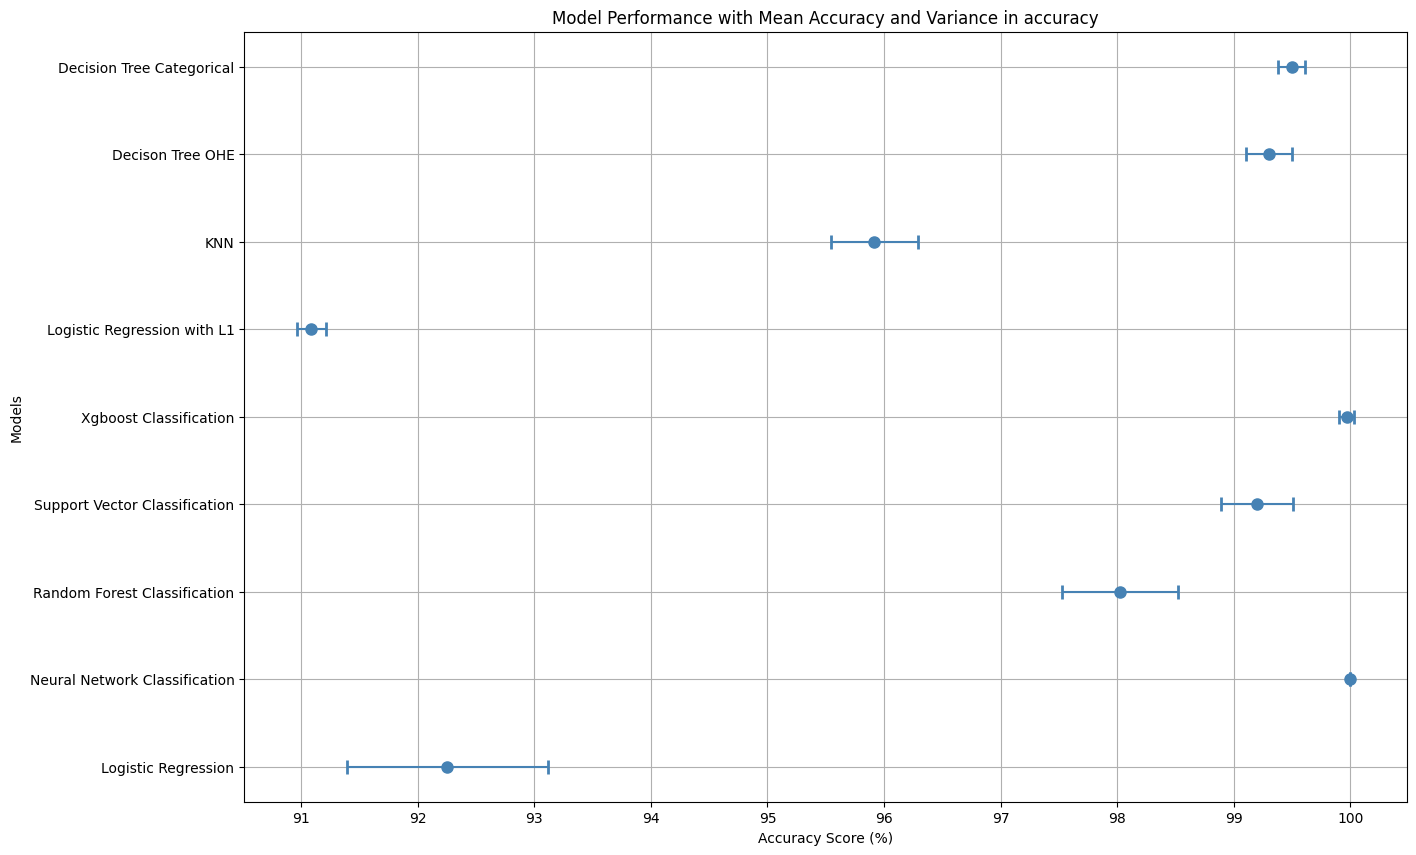

In [ ]:
models = ['Logistic Regression', 'Neural Network Classification', 'Random Forest Classification',
          'Support Vector Classification', 'Xgboost Classification','Logistic Regression with L1', 'KNN', 'Decison Tree OHE', 'Decision Tree Categorical']

means = [92.253, 100, 98.025, 99.198, 99.969, acc_lr, acc_knn, acc_dt_oh, acc_dt]

variances = [0.746, 0, 0.244, 0.095, 0.0038, var_lr, var_knn, var_dt_oh, var_dt]

std_dev = np.sqrt(variances)

plt.figure(figsize=(15, 10))
plt.errorbar(means, models, xerr=std_dev, fmt='o', capsize=5, capthick=2, markersize=8, color='steelblue')

plt.xlabel('Accuracy Score (%)')
plt.ylabel('Models')
plt.xticks(range(91,101))
plt.title('Model Performance with Mean Accuracy and Variance in accuracy')

plt.grid(True)

plt.show()

#Task 2

##Transforming Bipolar Sigmoid using unipolar sigmoid

Unipolar sigmoid is given by the following formula :
- sigmoid(x) = 1/(1+e^(-x)).
- It's value ranges from 0 to 1

Tranformation from unipolar to bipolar is done by scaling unipolar sigmoid as follows:
- bipolar_sigmoid(x) = 2 * sigmoid(x) - 1
- bipolar_ sigmoid(x) = -1 + 2/(1+e^(-x))
- The value for this transformed bipolar sigmoid will range from -1 to 1. (Same as the range of Tanh function.)

In [22]:
def bipolar_sigmoid(x):
  z  = 1/(1 + np.exp(-1*x))    #Sigmoid Function
  return 2 * z - 1


Tanh is another bipolar normalizer given by the following formula:

- tanh(x) = (e^(x) - e^(-x)) / (e^(x) + e^(-x))

##Visualizing response for Modified Bipolar Sigmoid and Tanh

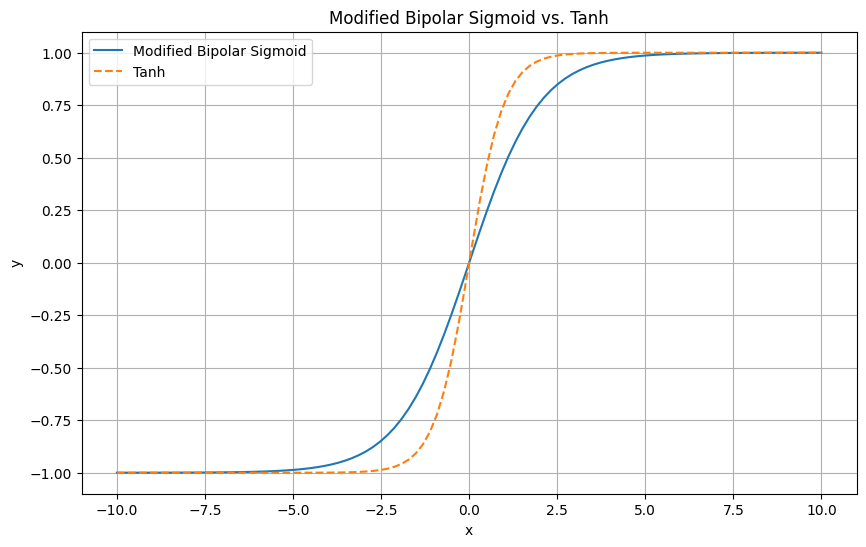

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-10, 10, 100), bipolar_sigmoid(np.linspace(-10, 10, 100)), label='Modified Bipolar Sigmoid')
plt.plot(np.linspace(-10, 10, 100), np.tanh(np.linspace(-10, 10, 100)), label='Tanh',linestyle ="--")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Modified Bipolar Sigmoid vs. Tanh')
plt.legend()
plt.grid(True)
plt.show()

The response for our Bipolar Sigmoid is very simlar to Tanh normalizer,
- They both range from -1 to 1
- Near origin, the steepness of slope for tanh is more than bipolar sigmoid

##Parameterizing and plotting Tanh and Bipolar sigmoid using different values of parameter "a"

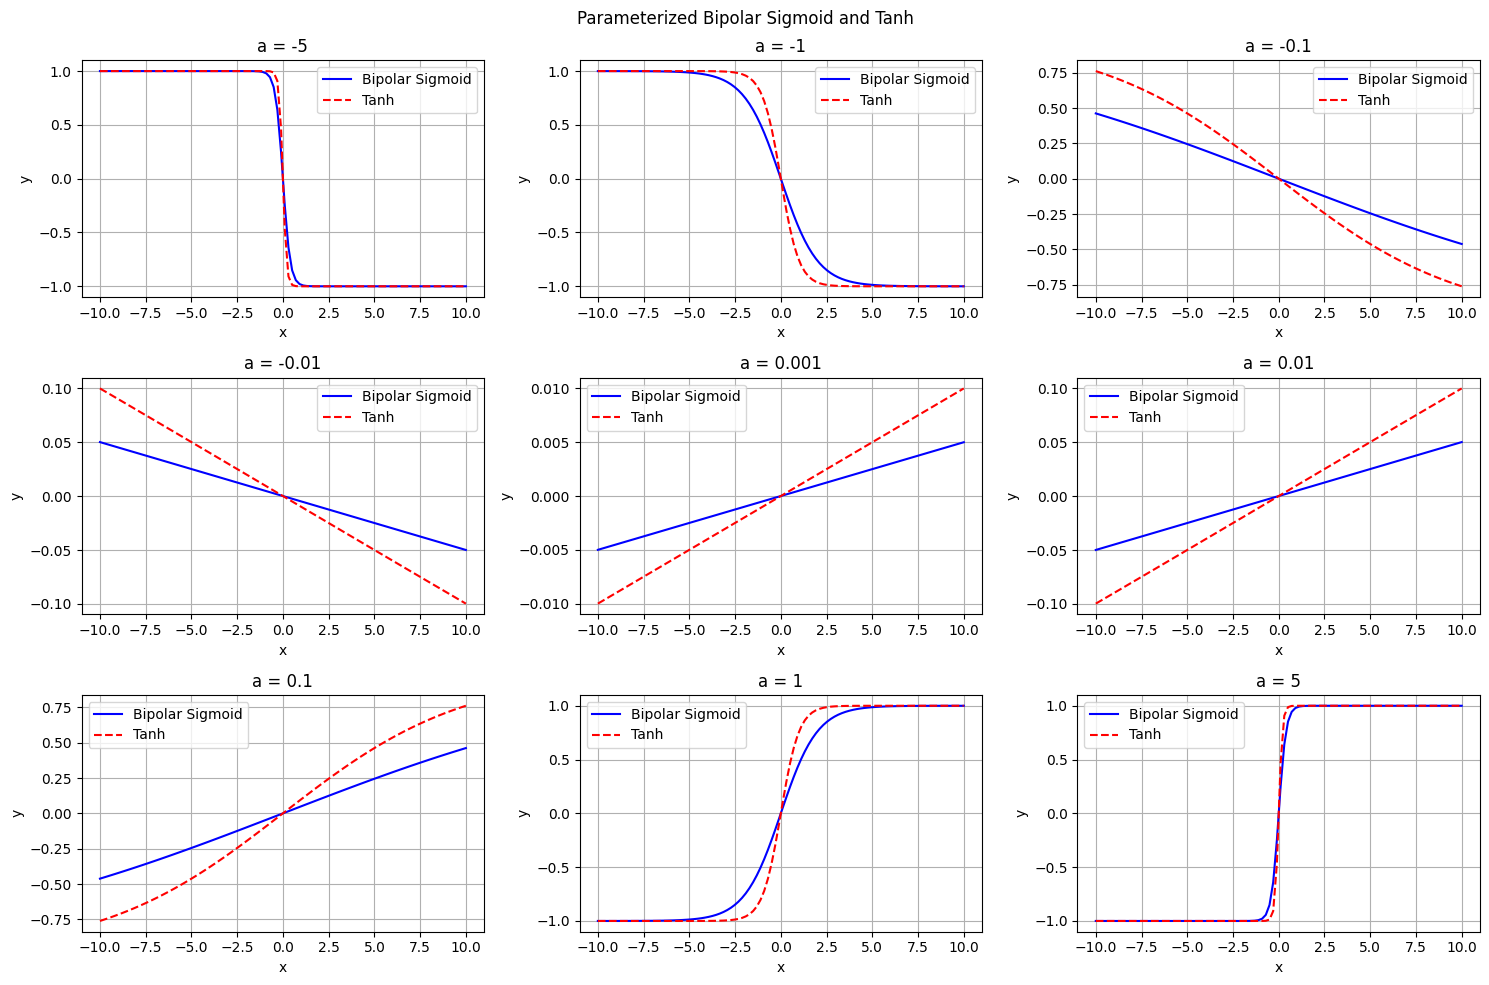

In [29]:
a_values = [-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]
x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.ravel()  # Flatten 2D plots

for idx, a in enumerate(a_values):
    bipolar_sigmoid_vals = bipolar_sigmoid(a * x)
    tanh_vals = np.tanh(a * x)

    ax[idx].plot(x, bipolar_sigmoid_vals, label='Bipolar Sigmoid', color='blue')
    ax[idx].plot(x, tanh_vals, label='Tanh', color='red', linestyle='--')

    ax[idx].set_xlabel('x')
    ax[idx].set_ylabel('y')
    ax[idx].set_title(f'a = {a}')
    ax[idx].legend()
    ax[idx].grid(True)

plt.suptitle("Parameterized Bipolar Sigmoid and Tanh")
plt.tight_layout()
plt.show()


##Linearity Analysis from the graphs above


1. **When \(a = -5, 5\)**: Both functions respond very sharply, with a steep transition near \(x = 0\). The non-linearity is significant.
2. **As \(a\) decreases \(a = 1, 0.1\)**: The functions become less steep, and the transition becomes smoother, resulting in a wider range around \(x = 0\) where the output changes gradually.
3. **When \(a\) is very small \(a = -0.01 to 0.01\)**: The curves almost appear linear across a broad range of \(x\), indicating a larger region of linear behavior.

### Linear Range Analysis:
The linear range of the bipolar sigmoid increases as \(a\) tends closer to zero (e.g. -0.01 to 0.01). For very small \(a\) values, the bipolar sigmoid behaves almost **linearly over a wide range of \(x\)**, while for \(a\) values away from Zero (e.g. -5, -1, 1, -5), the function behaves more like a step function with a sharp transition at \(x = 0\).
